In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets
from scipy import stats

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [2]:
df_train = pd.read_csv('train mobile phone.csv')
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [3]:
df_test = pd.read_csv('test mobile phone.csv')
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [4]:
df_train.shape

(2000, 21)

In [5]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Cek apakah data yang missing/null dll
def missing_data(df_train):
    miss1 = pd.DataFrame(df_train.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df_train.isnull().sum()/df_train.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]
missing_data(df_train)

Empty DataFrame
Columns: [columns, Num of Miss, Perc of Miss]
Index: []

In [8]:
# Cek apakah ada data duplikasi
df_train.duplicated().any()

False

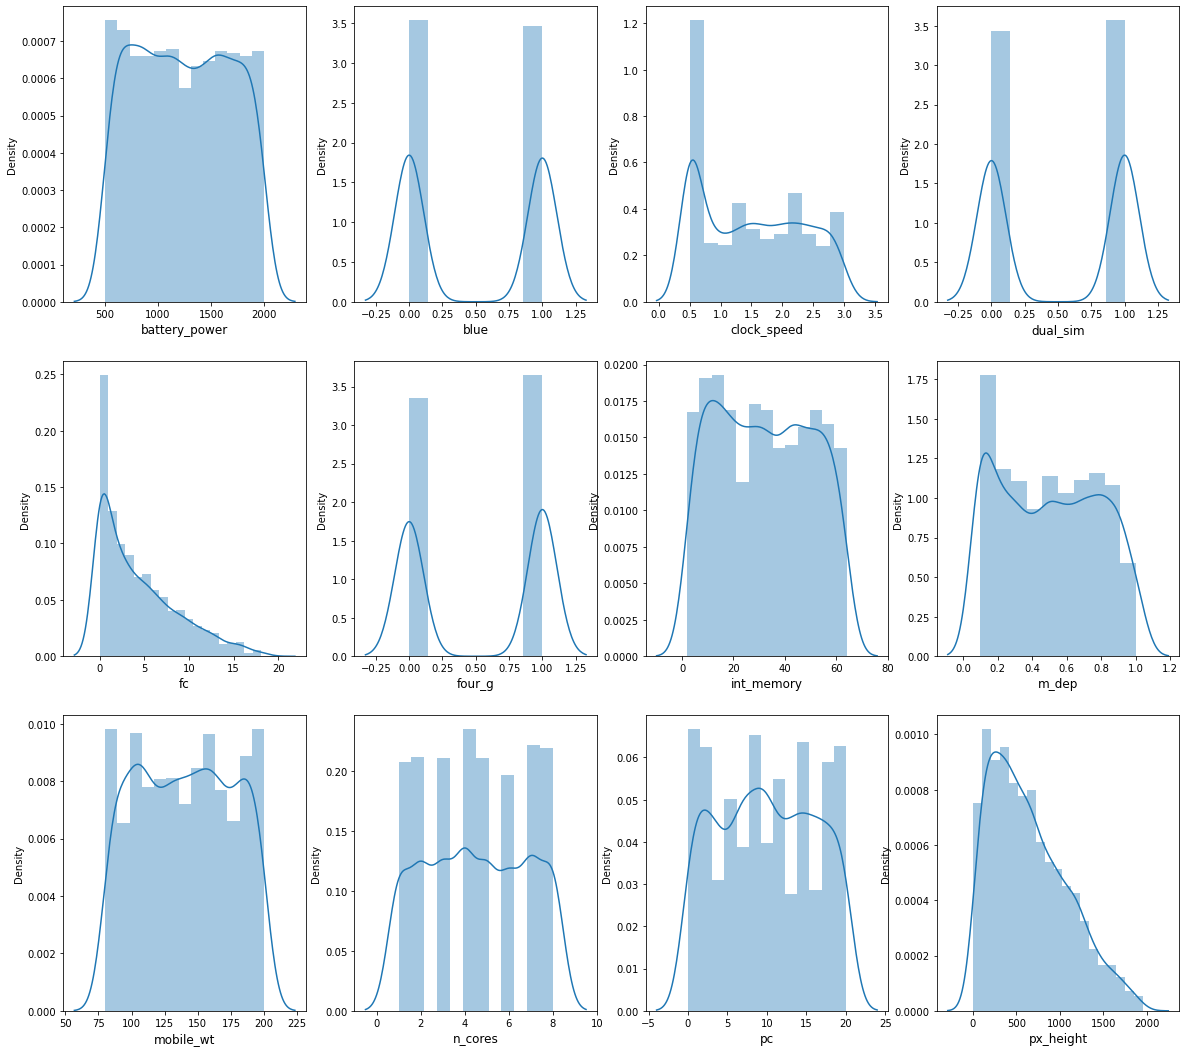

In [9]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df_train:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df_train[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

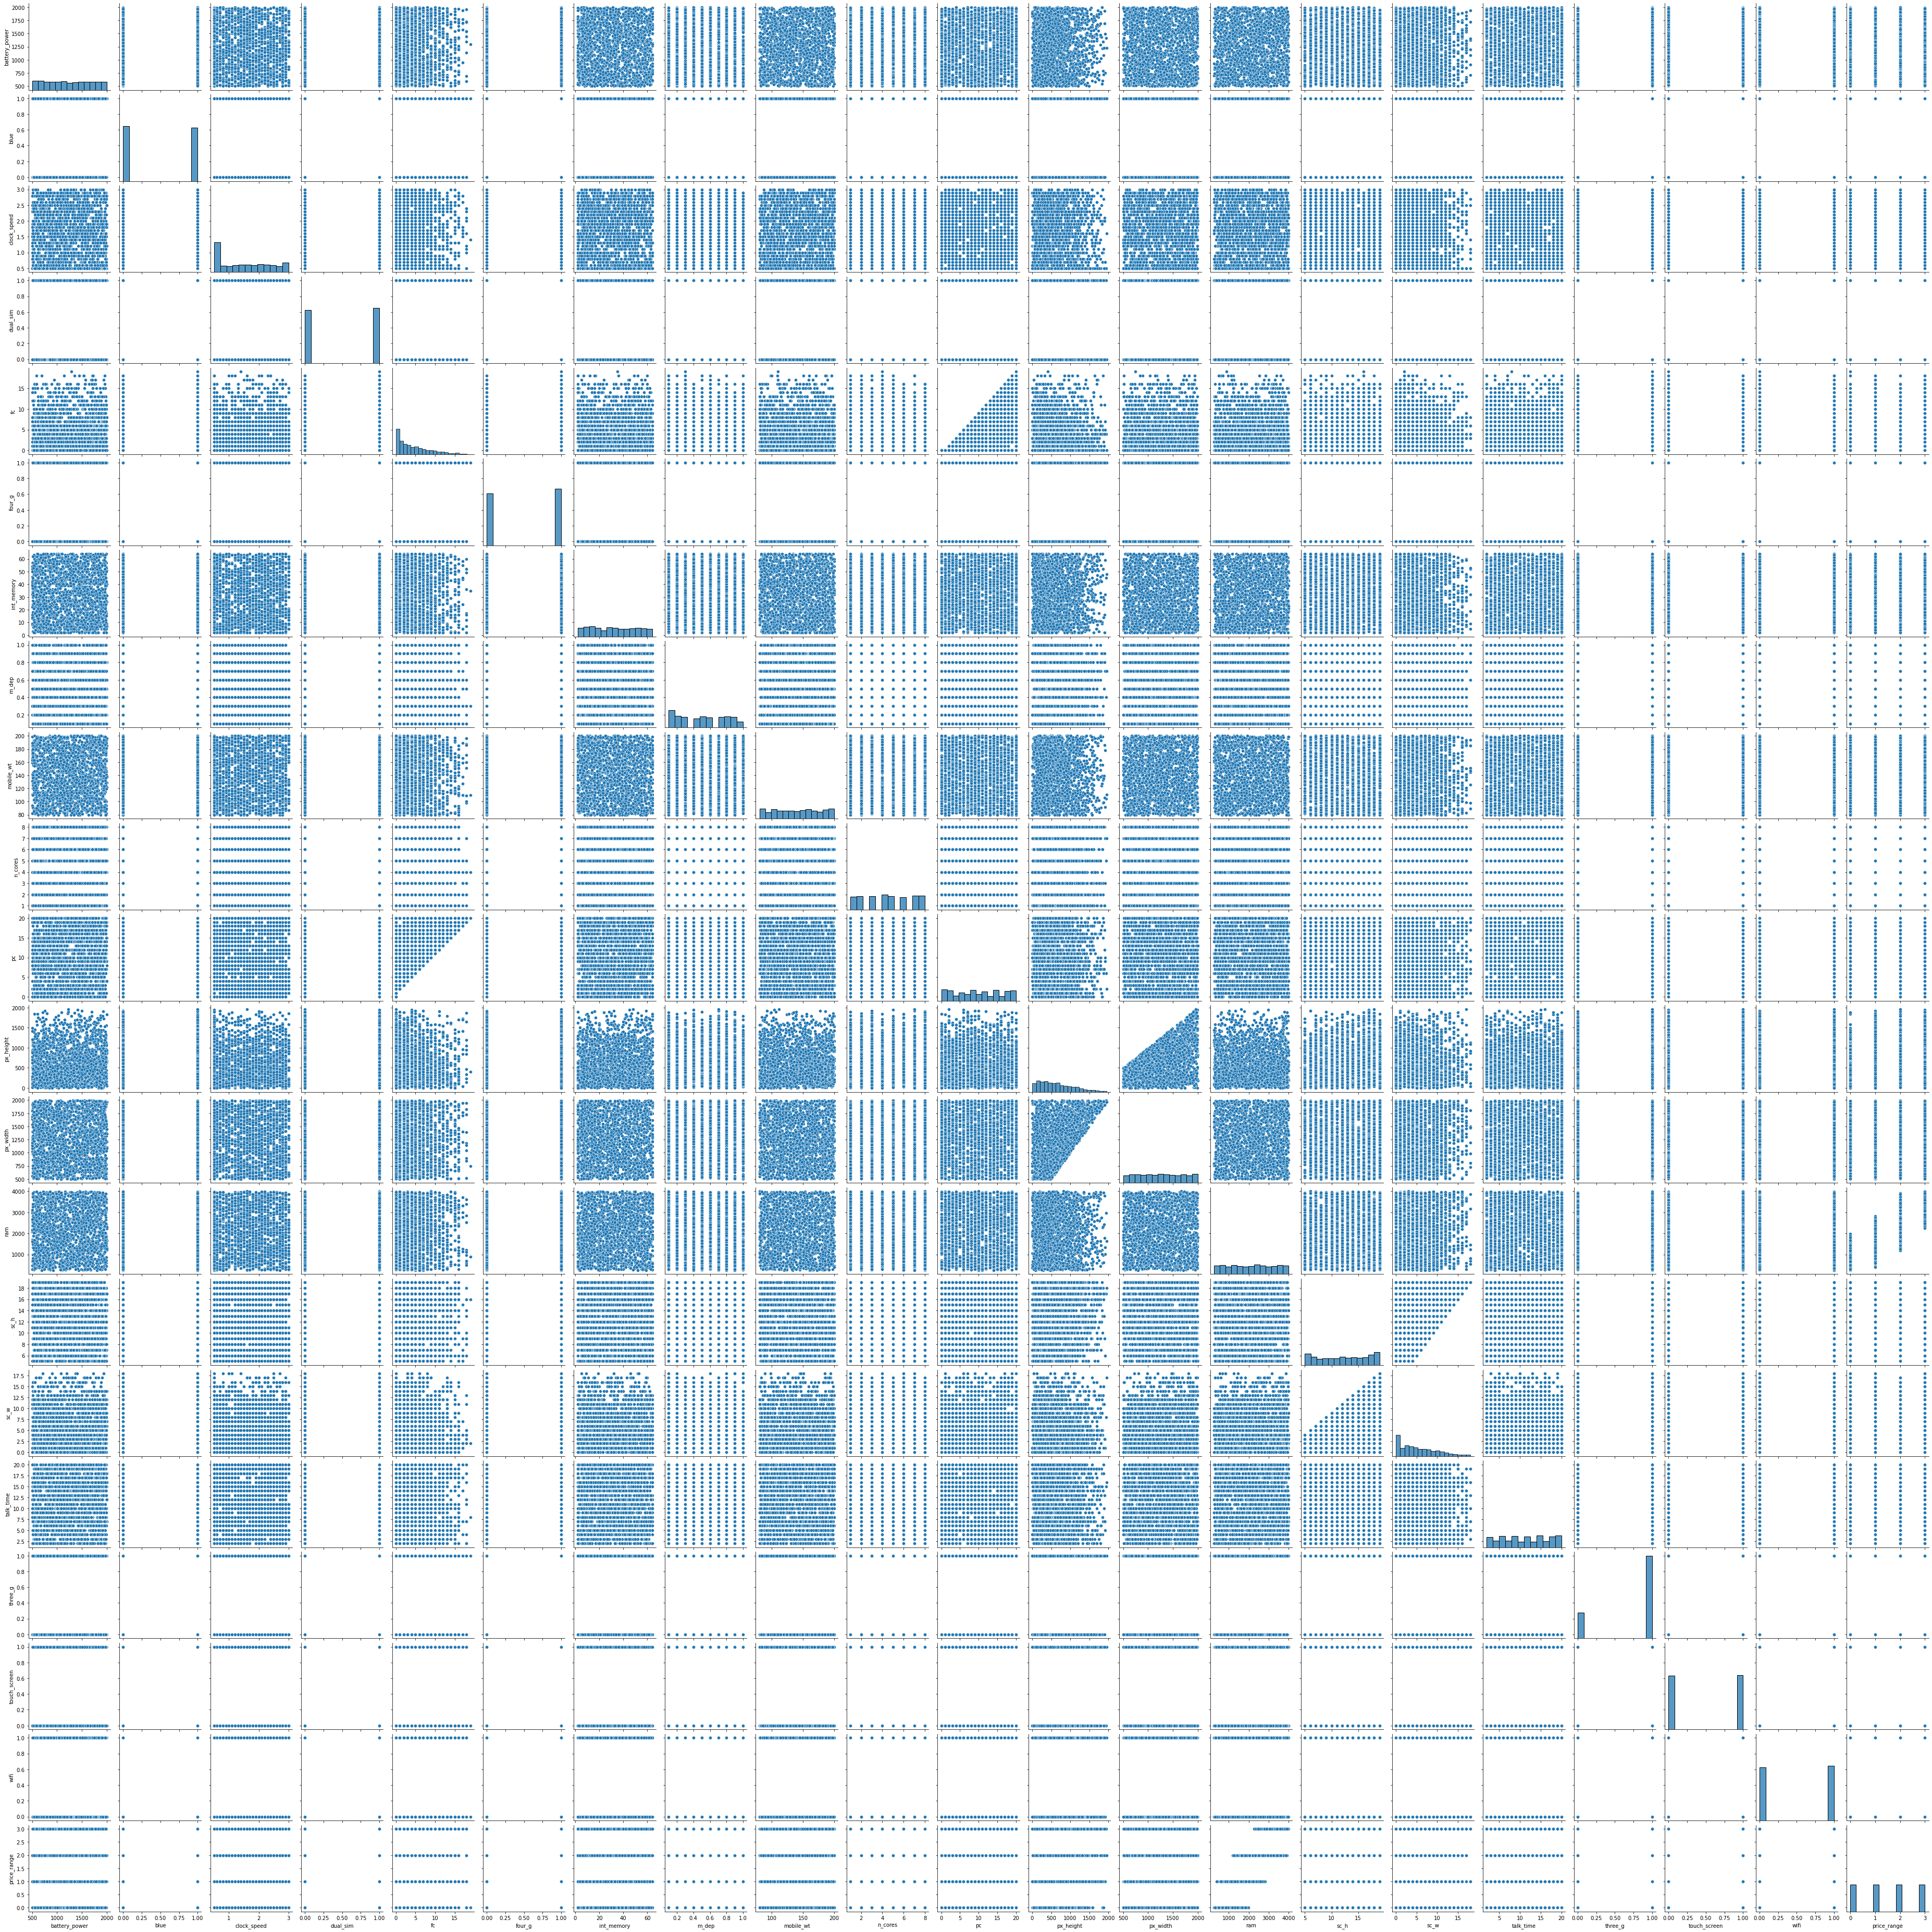

In [10]:
sns.pairplot(df_train)

In [11]:
X =df_train.drop('price_range',axis=1)
y =df_train['price_range']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
scale=StandardScaler()
scaled=scale.fit_transform(X)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=X.columns
vif

vif       features
0   1.009945  battery_power
1   1.011342           blue
2   1.006025    clock_speed
3   1.011555       dual_sim
4   1.718987             fc
5   1.528509         four_g
6   1.009274     int_memory
7   1.006385          m_dep
8   1.004548      mobile_wt
9   1.008442        n_cores
10  1.720785             pc
11  1.369052      px_height
12  1.362399       px_width
13  1.008331            ram
14  1.356109           sc_h
15  1.353648           sc_w
16  1.010502      talk_time
17  1.527367        three_g
18  1.006278   touch_screen
19  1.009100           wifi

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [15]:
y_train

469     1
565     0
396     3
452     3
325     0
       ..
1170    0
100     3
63      2
180     0
876     0
Name: price_range, Length: 1600, dtype: int64

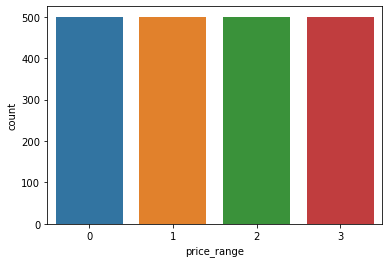

In [16]:
sns.countplot(x='price_range' , data = df_train)

## XGBOOST

In [17]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [18]:
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train, y_train)

pred_xgb = xgb_fit.predict(X_test)

[10:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.86      0.84      0.85       100
           2       0.81      0.88      0.84       100
           3       0.97      0.91      0.94       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



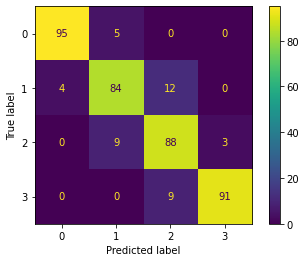

In [19]:
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [20]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

Features     Score
13            ram  0.407666
0   battery_power  0.070839
11      px_height  0.062058
12       px_width  0.054600
19           wifi  0.041646

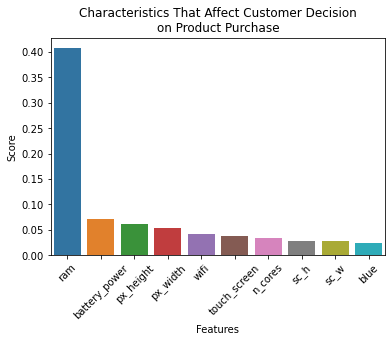

In [21]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [22]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [24]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train, y_train)

In [25]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

## Random Forest

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



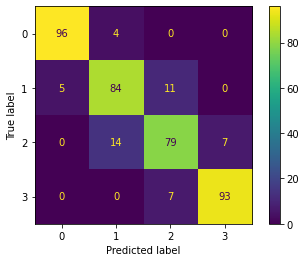

In [26]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [27]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

Features     Score
13            ram  0.480768
0   battery_power  0.072976
12       px_width  0.056089
11      px_height  0.056000
8       mobile_wt  0.039007

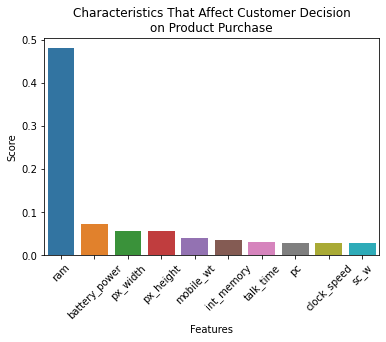

In [28]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## SVM

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.93      0.97      0.95       100
           2       0.96      0.89      0.92       100
           3       0.96      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



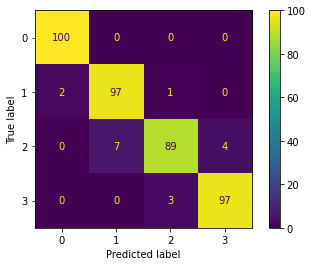

In [29]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_test_pred2 = svc.predict(X_test)
y_train_pred2=svc.predict(X_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Train Set Accuracy:95.375
Test Set Accuracy:95.75

Confusion Matrix:
[[100   2   0   0]
 [  0  97   7   0]
 [  0   1  89   3]
 [  0   0   4  97]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.97      0.93      0.95       104
           2       0.89      0.96      0.92        93
           3       0.97      0.96      0.97       101

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       100
           1       0.52      0.50      0.51       100
           2       0.41      0.43      0.42       100
           3       0.65      0.66      0.65       100

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.60       400
weighted avg       0.61      0.60      0.60       400



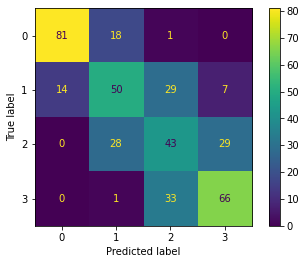

In [31]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



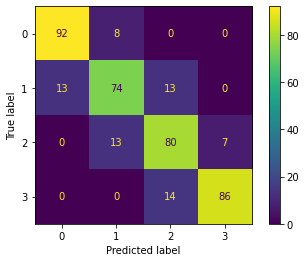

In [32]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [33]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

Features     Score
13            ram  0.610374
0   battery_power  0.124187
11      px_height  0.088620
12       px_width  0.083946
8       mobile_wt  0.017397

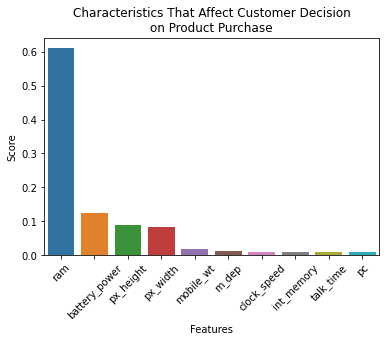

In [34]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## KNN

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.92      0.93      0.93       100
           2       0.90      0.87      0.88       100
           3       0.94      0.95      0.95       100

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.94      0.93       400



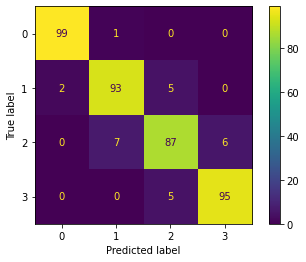

In [35]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:93.75
Test Set Accuracy:94.75

Confusion Matrix:
[[100   2   0   0]
 [  0  95   7   0]
 [  0   3  89   5]
 [  0   0   4  95]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.95      0.93      0.94       102
           2       0.89      0.92      0.90        97
           3       0.95      0.96      0.95        99

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



## Naive Bayes

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.71      0.69      0.70       100
           2       0.70      0.73      0.71       100
           3       0.91      0.92      0.92       100

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



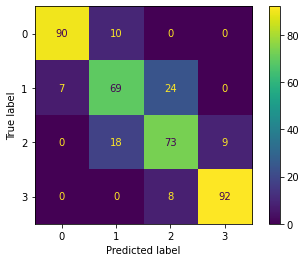

In [37]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [38]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [39]:
#import gridsearch
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_param = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_param

model  best_score  \
0                  svm      0.9610   
1        random_forest      0.8850   
2  logistic_regression      0.9635   

                                         best_params  
0      {'C': 6.0, 'gamma': 'scale', 'kernel': 'rbf'}  
1  {'criterion': 'gini', 'max_features': 'auto', ...  
2  {'C': 1.0, 'multi_class': 'auto', 'n_jobs': -1...

In [40]:
df_param['best_params'][2]

{'C': 1.0,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [41]:
model = LogisticRegression(C=1.0, multi_class='auto', penalty='l2', solver='newton-cg', n_jobs=-1)

In [42]:
model.fit(X, y)

LogisticRegression(n_jobs=-1, solver='newton-cg')

In [43]:
y_test_pred_model = model.predict(X_test)
y_train_pred_model=model.predict(X_train)

modellogreg_acc=accuracy_score(y_test_pred_model,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model,y_test))

Train Set Accuracy:98.25
Test Set Accuracy:98.5

Confusion Matrix:
[[100   0   0   0]
 [  0  98   0   0]
 [  0   2  98   2]
 [  0   0   2  98]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      1.00      0.99        98
           2       0.98      0.96      0.97       102
           3       0.98      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.98      0.98      0.98       400



In [44]:
df_param['best_params'][0]

{'C': 6.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [45]:
model2 = SVC(C=6.0, gamma ='scale', kernel = 'rbf')

In [46]:
model2.fit(X, y)

SVC(C=6.0)

In [47]:
y_test_pred_model2 = model2.predict(X_test)
y_train_pred_model2 =model2.predict(X_train)

modelsvc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model2,y_test))

Train Set Accuracy:96.4375
Test Set Accuracy:97.5

Confusion Matrix:
[[100   0   0   0]
 [  0  98   2   0]
 [  0   2  94   2]
 [  0   0   4  98]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.98      0.98       100
           2       0.94      0.96      0.95        98
           3       0.98      0.96      0.97       102

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



## Kesimpulan

Dari hasil hyperparameter tuning, hasil dari logistic regression mengalami peningkatan yang tinggi sampai 98%, untuk itu bisa dipakai Logistic Regression hasil dari hyperparameter tuning

**Logistic Regression**